In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [36]:
df = pd.read_excel("incomes.xlsx")
df.head()

,Name,Age,Income
0,rob,27,70000
1,michael,29,90000
2,mohan,29,61000
3,ismali,28,150000
4,kory,42,155000


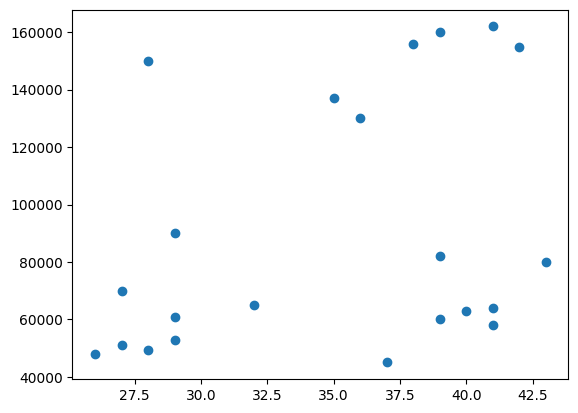

In [37]:
plt.scatter(df['Age'],df['Income'])

In [38]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [39]:
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

C:\Users\Surya Teja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1])

In [40]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,rob,27,70000,2
1,michael,29,90000,2
2,mohan,29,61000,1
3,ismali,28,150000,0
4,kory,42,155000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


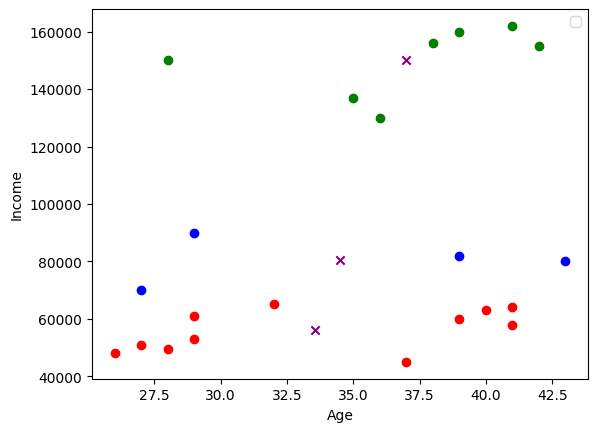

In [41]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='x')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [42]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income,cluster
0,rob,0.058824,0.213675,2
1,michael,0.176471,0.384615,2
2,mohan,0.176471,0.136752,1
3,ismali,0.117647,0.897436,0
4,kory,0.941176,0.940171,0


In [43]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

C:\Users\Surya Teja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [44]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,rob,0.058824,0.213675,1
1,michael,0.176471,0.384615,1
2,mohan,0.176471,0.136752,1
3,ismali,0.117647,0.897436,0
4,kory,0.941176,0.940171,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


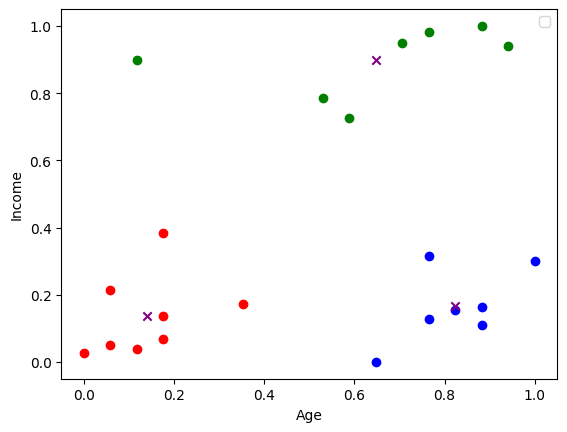

In [45]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='x')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [46]:
km.cluster_centers_

array([[0.64705882, 0.8974359 ],
       [0.13970588, 0.13621795],
       [0.82352941, 0.16727717]])

In [50]:
sse = []
n=10
for k in range(1,10):
    km = KMeans(n_clusters=k,n_init=n)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)
sse

[5.43401151198818,
 2.603647116287225,
 0.8542844170644501,
 0.5172211042891329,
 0.3742044978708763,
 0.2791000039950149,
 0.21012256492323333,
 0.1717230821976039,
 0.13279516939277985]

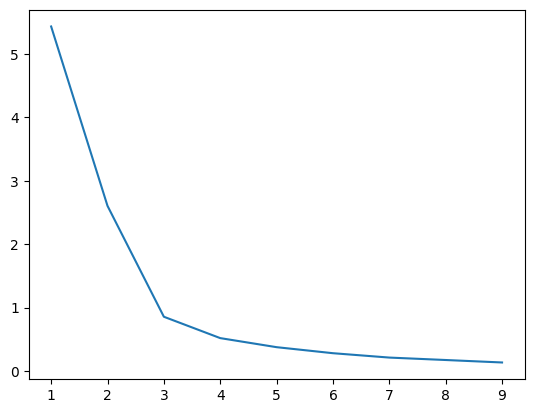

In [51]:
k_range = range(1,10)
plt.plot(k_range,sse)